In [724]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [725]:
dataset = pd.read_csv ("D3.csv")
dataset.head()
M = len(dataset)
M

99

In [726]:
X = dataset.values[:, 0]
K = dataset.values[:, 1]
Z = dataset.values[:, 2]
Y = dataset.values[:, 3]
M = len(Y);
print('X = ',X[:99])# Show all records
print('K = ',K[:99])
print('Z = ',Z[:99])
print('Y = ',Y[:99])
print('M = ',M)

X =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202  0.24242424
 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444 0.48484848
 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869 0.72727273
 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293 0.96969697
 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717 1.21212121
 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141 1.45454546
 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566 1.6969697
 1.73737374 1.77777778 1.81818182 1.85858586 1.8989899  1.93939394
 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414 2.18181818
 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838 2.42424242
 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263 2.66666667
 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687 2.90909091
 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111 3.15151515
 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535 3.39393939
 3.43434343 3.47474748 3.51515151 3.55555556 3.5959596  3.

Text(0.5, 1.0, 'Scatter plot of Training Data')

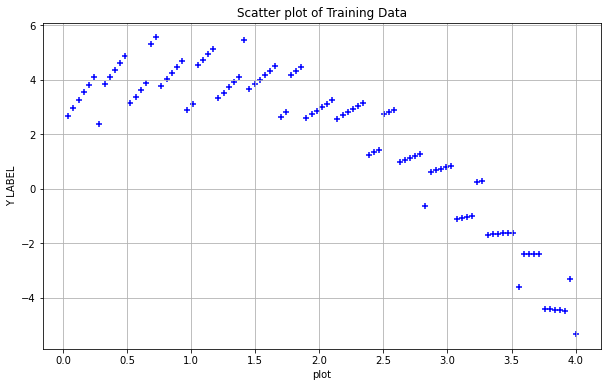

In [727]:
plt.scatter(X,Y, color = 'blue' , marker = '+')
plt.grid()
plt.rcParams["figure.figsize"]= (10,6)
plt.xlabel('plot')
plt.ylabel('Y LABEL')
plt.title('Scatter plot of Training Data')


Text(0.5, 1.0, 'Scatter plot of Training Data')

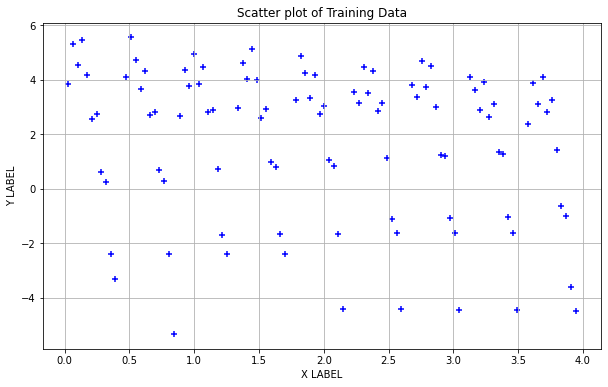

In [728]:
plt.scatter(Z,Y, color = 'blue' , marker = '+')
plt.grid()
plt.rcParams["figure.figsize"]= (10,6)
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Scatter plot of Training Data')

Text(0.5, 1.0, 'Scatter plot of Training Data')

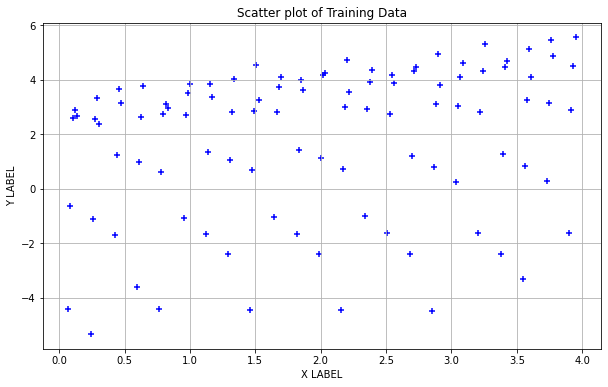

In [729]:
plt.scatter(K,Y, color = 'blue' , marker = '+')
plt.grid()
plt.rcParams["figure.figsize"]= (10,6)
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Scatter plot of Training Data')

In [730]:
A = np.ones((M, 1))
A[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [731]:
X1 = X.reshape(M,1)
X2 = K.reshape(M,1)
X3 = Z.reshape(M,1)

X1[:10]
X2[:10]
X3[:10]


array([[0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364],
       [0.92484849]])

In [732]:
X = np.hstack((A, X1))
X[:5]

array([[1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616],
       [1.        , 0.2020202 ]])

In [733]:
theta = np.zeros(2)
theta

array([0., 0.])

In [734]:
def compute_cost(X, Y, theta):
    predictions=X.dot(theta)
    errors=np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*M)*np.sum(sqrErrors)
    
    return J

In [735]:
cost = compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)

The cost for given values of theta_0 and theta_1 = 5.483015861695442


In [736]:
def gradient_descent(X,Y,theta,alpha,iterations):
    
    cost_history =np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,Y)
        sum_delta=(alpha/M)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta, cost_history

In [737]:
theta = [0.,0.]
iterations=1500;
alpha=0.003;

In [738]:
theta, cost_history=  gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 3.74967817 -1.19099814]
cost_history = [5.47043785 5.45812565 5.4460697  ... 1.60586478 1.60506065 1.60425757]


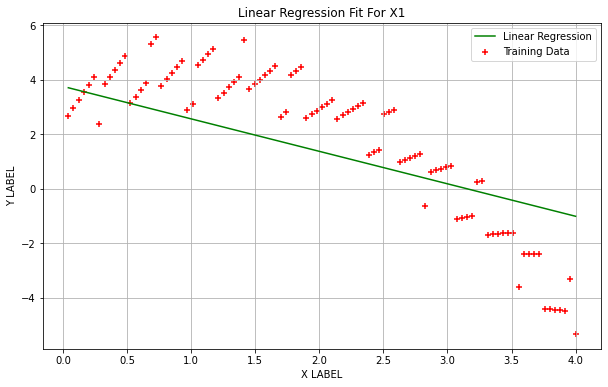

In [739]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Linear Regression Fit For X1')
plt.legend()



Text(0.5, 1.0, 'Convergence of gradient descent')

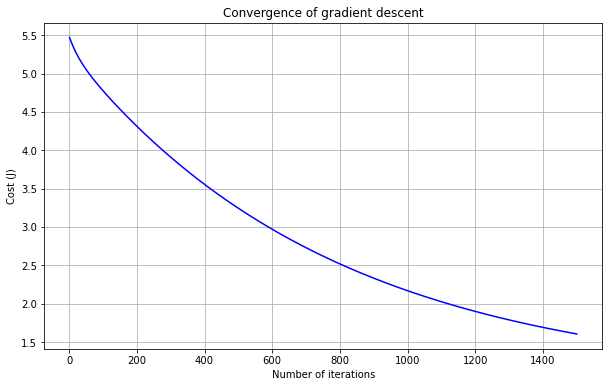

In [740]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [741]:
X = np.hstack((A, X2))

In [742]:
X[:5]

array([[1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798],
       [1.        , 2.91474747]])

In [743]:
theta = np.zeros(2)
theta

array([0., 0.])

In [744]:
def compute_cost(X, Y, theta):
    predictions=X.dot(theta)
    errors=np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*M)*np.sum(sqrErrors)
    
    return J

In [745]:
cost = compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)

The cost for given values of theta_0 and theta_1 = 5.483015861695442


In [746]:
def gradient_descent(X,Y,theta,alpha,iterations):
    
    cost_history =np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,Y)
        sum_delta=(alpha/M)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta, cost_history

In [747]:
theta = [0.,0.]
iterations=1500;
alpha=0.1;

In [748]:
theta, cost_history=  gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [0.75592882 0.53878239]
cost_history = [3.93057836 3.6900397  3.65195822 ... 3.62015665 3.62015665 3.62015665]


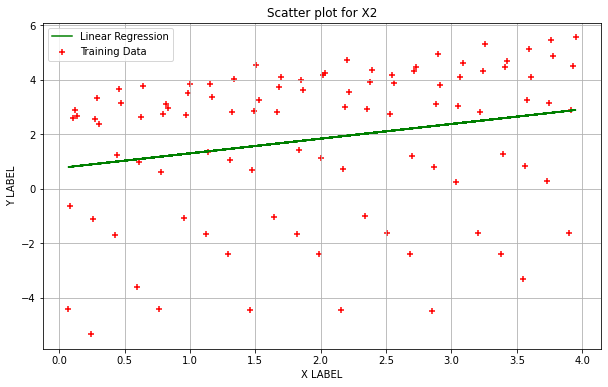

In [749]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Scatter plot for X2')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent for X2')

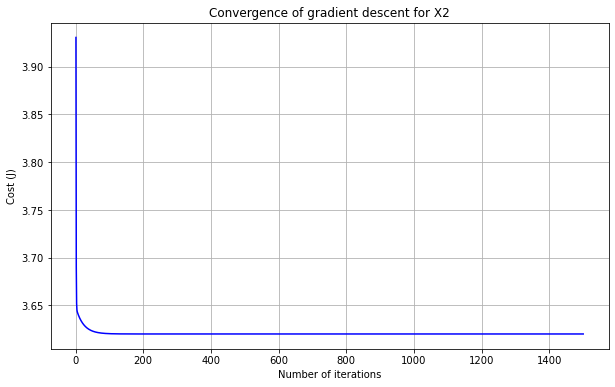

In [750]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X2')

In [751]:
X = np.hstack((A, X3))
X[:5]

array([[1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939],
       [1.        , 2.68242424]])

In [643]:
theta = np.zeros(2)
theta

array([0., 0.])

In [644]:
def compute_cost(X, Y, theta):
    predictions=X.dot(theta)
    errors=np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*M)*np.sum(sqrErrors)
    
    return J

In [645]:
cost = compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)

The cost for given values of theta_0 and theta_1 = 5.483015861695442


In [646]:
def gradient_descent(X,Y,theta,alpha,iterations):
    
    cost_history =np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,Y)
        sum_delta=(alpha/M)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta, cost_history

In [647]:
theta, cost_history=  gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 2.71943299 -0.46300206]
cost_history = [5.366643   5.26340773 5.17178032 ... 3.65144217 3.65143712 3.6514321 ]


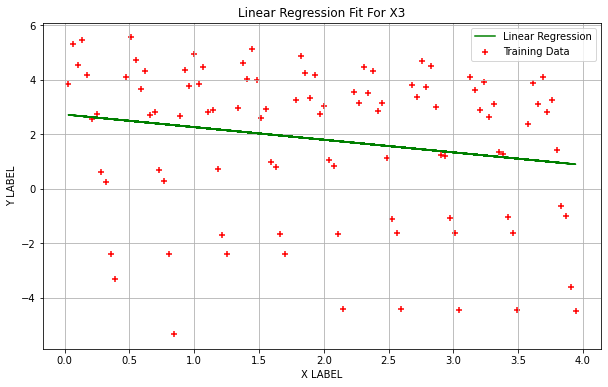

In [648]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Linear Regression Fit For X3')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent For X3')

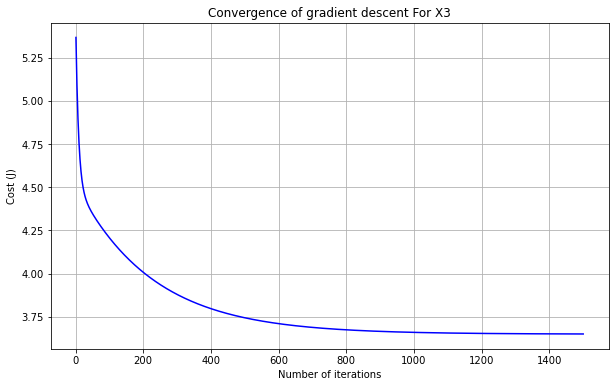

In [649]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent For X3')

In [650]:
X = np.hstack((A, X1, X2, X3))
X[:5]

array([[1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939],
       [1.        , 0.2020202 , 2.91474747, 2.68242424]])

In [651]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [652]:
def compute_cost(X, Y, theta):
    predictions=X.dot(theta)
    errors=np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*M)*np.sum(sqrErrors)
    
    return J

In [653]:
cost = compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)

The cost for given values of theta_0 and theta_1 = 5.483015861695442


In [654]:
def gradient_descent(X,Y,theta,alpha,iterations):
    
    cost_history =np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,Y)
        sum_delta=(alpha/M)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    return theta, cost_history

In [717]:
theta = [0.,0.,0.,0.]
iterations=1500;
alpha=0.1;   
    

In [718]:
theta, cost_history=  gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 5.41374693 -2.04203017  0.56122181 -0.2921286 ]
cost_history = [4.1450758  3.54646843 3.16253942 ... 0.70818787 0.70818787 0.70818787]


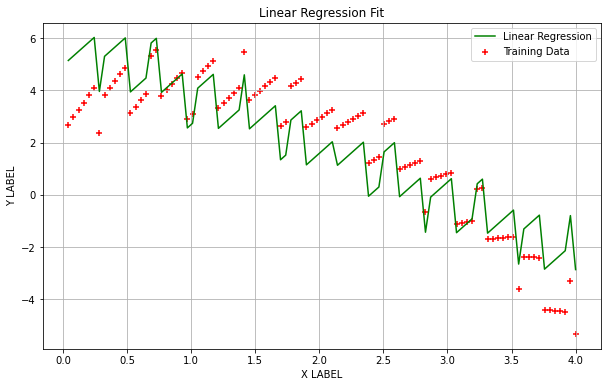

In [719]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.title('Linear Regression Fit')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent')

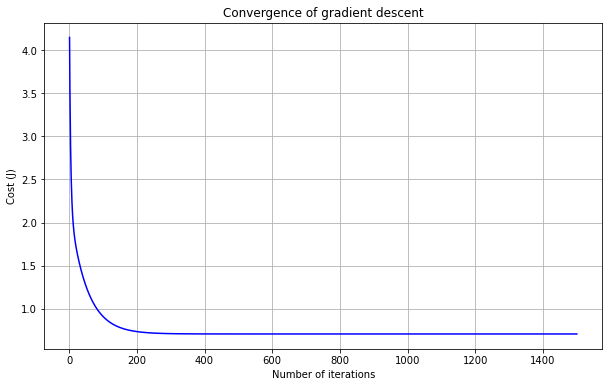

In [720]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [721]:
X1 = np.array([1,1,1,1])
X2 = np.array([1,2,0,4])
X3 = np.array([1,3,2,1])
y1 = X1.dot(theta)
y2 = X2.dot(theta)
y3 = X3.dot(theta)


print('Y1 =', y1)
print('Y2 =', y2)
print('Y3 =', y3)

Y1 = 3.6408099791290236
Y2 = 0.16117220229453455
Y3 = 0.11797145622261773
